In [1]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [10]:

# Parameters for the dataset
n_samples = 1000
n_features = 6000
n_informative = 100
n_redundant = 0
n_repeated = 0
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    n_classes=2,
    random_state=42,
    n_clusters_per_class=2,
    shuffle=False,
    shift=25,
    scale=1.5
)


In [11]:
(X < 0).sum()

0

In [12]:
# X_log2 = np.log2(X + 1)
# noise = np.random.normal(0, 0.1, X_log2.shape)
# X_log2_hetero = X_log2 + noise

In [13]:

X = pd.DataFrame(X, columns=[f'Protein_{i+1}' for i in range(n_features)])

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_5991,Protein_5992,Protein_5993,Protein_5994,Protein_5995,Protein_5996,Protein_5997,Protein_5998,Protein_5999,Protein_6000
0,32.346461,49.749240,38.476201,49.770669,42.588762,37.100964,50.216661,46.628490,30.985063,44.329777,...,37.219997,36.647989,36.136860,36.644028,36.846296,39.591953,35.927573,36.711284,37.971208,38.764428
1,30.152974,35.986539,19.048811,27.530915,40.881872,31.521212,37.311776,39.736299,43.106596,61.002484,...,35.663048,36.574790,40.340993,37.740953,37.341933,38.012037,36.310348,35.215622,37.295730,38.172042
2,44.658761,37.334348,26.051504,44.829564,45.812500,50.519480,32.153990,37.531520,25.158132,43.647159,...,37.505474,36.203246,37.623258,38.625519,37.060219,35.504341,36.578028,37.692171,36.054756,38.681768
3,44.043844,27.194085,24.791703,27.886111,35.711992,52.414614,28.325659,28.365847,28.048936,18.665796,...,39.038704,40.941549,36.595558,36.521572,40.182860,36.697195,35.469128,39.727537,38.620665,39.757380
4,34.016481,37.634974,42.334308,43.953238,43.381144,33.974264,39.869167,20.723692,35.742290,34.644662,...,35.625828,35.761774,37.922877,38.327042,40.125906,36.565016,38.433404,38.167011,37.499823,35.788923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37.883034,37.484836,34.115342,18.378619,48.962919,22.678608,26.550724,44.344086,25.739943,43.855031,...,35.753493,37.268540,40.896475,40.237413,36.420841,35.288348,40.563660,37.701756,37.807486,37.763951
996,30.809852,38.383769,27.980820,31.145425,30.002316,28.902855,49.234481,35.620255,38.572339,32.109829,...,35.473300,36.675020,36.524850,39.135370,37.761462,40.566858,39.829079,36.542130,36.543429,38.990286
997,22.487571,29.773440,46.337853,38.173359,42.633151,23.018241,53.377969,42.250758,44.226263,29.825853,...,37.166998,37.320736,36.118450,38.996980,36.003734,37.175731,37.070213,34.582479,39.476044,37.282159
998,43.726361,39.261654,37.996342,39.062927,27.388203,33.125269,25.378374,31.385100,40.903296,42.353887,...,36.826353,39.783733,37.810672,35.005583,37.982364,35.021559,36.828353,38.873720,38.079041,40.712239


In [6]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [7]:
from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

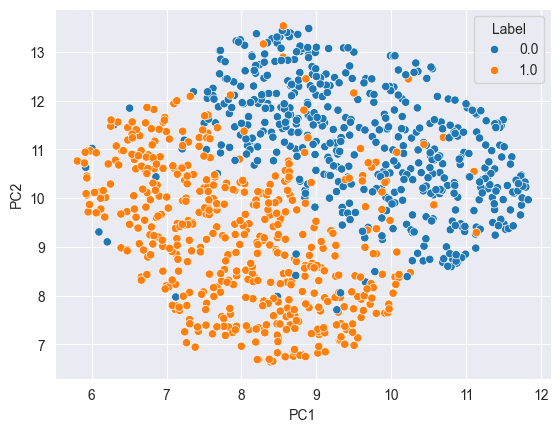

In [9]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#import xgboost

# clf = xgboost.XGBClassifier(
#     #max_depth=10,
#     n_jobs=1,
#     #subsample=0.5,
#     #reg_lambda=2,
#     # objective="binary:logitraw",
#     # seed=42,
#     # eval_metric="logloss",
# )
# clf = HistGradientBoostingClassifier()
clf = LogisticRegression(
    n_jobs=1,
    max_iter=1000,
)
#clf = SVC(kernel="linear")
#clf = RandomForestClassifier()
#clf = Lasso()
#clf = AdaBoostClassifier()
#clf = SGDClassifier()

clf.fit(X[:].values, y)

LogisticRegression(max_iter=1000, n_jobs=1)

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, scoring='roc_auc', cv=5, n_jobs=1)

array([0.7869    , 0.809     , 0.8842    , 0.8516    , 0.84568457])

In [12]:
from sklearn.feature_selection import f_classif

f_statistics, pvalues = f_classif(X, y)

In [13]:
from sklearn.inspection import permutation_importance


importances = permutation_importance(
    clf,
    X.values,
    y,
    scoring="neg_log_loss",
    n_jobs=1,
    #max_samples=0.5,
    n_repeats=3,
)

In [14]:
importances['importances_mean'].shape

(6000,)

In [15]:
np.abs(X[y == 1].mean(axis=0) - X[y == 0].mean(axis=0))

Protein_1       0.449610
Protein_2       0.171962
Protein_3       1.047580
Protein_4       0.149161
Protein_5       1.213110
                  ...   
Protein_5996    0.077153
Protein_5997    0.027629
Protein_5998    0.069923
Protein_5999    0.020111
Protein_6000    0.132510
Length: 6000, dtype: float64

In [16]:
feature_importances = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": importances['importances_mean'],
        "pvalue": pvalues,
        "feature_diff": np.abs(X[y == 1].mean(axis=0) - X[y == 0].mean(axis=0)).values
    }
)

In [17]:
feature_importances.sort_values("pvalue", ascending=True)

,feature,importance,pvalue,feature_diff
13,Protein_14,4.815323e-03,3.480136e-13,2.576504
60,Protein_61,6.153982e-03,7.987056e-11,2.409246
47,Protein_48,7.924884e-03,3.995640e-09,2.227215
68,Protein_69,9.164897e-04,9.049424e-09,2.204364
66,Protein_67,3.425597e-03,1.394999e-08,2.022964
...,...,...,...,...
1145,Protein_1146,9.717460e-07,9.996192e-01,0.000031
4182,Protein_4183,-8.636884e-10,9.997108e-01,0.000023
454,Protein_455,3.948001e-07,9.998612e-01,0.000011
5620,Protein_5621,3.933681e-07,9.998893e-01,0.000009


In [18]:
feature_importances['feature'] = feature_importances['feature'].astype(str)

<Axes: xlabel='importance', ylabel='feature'>

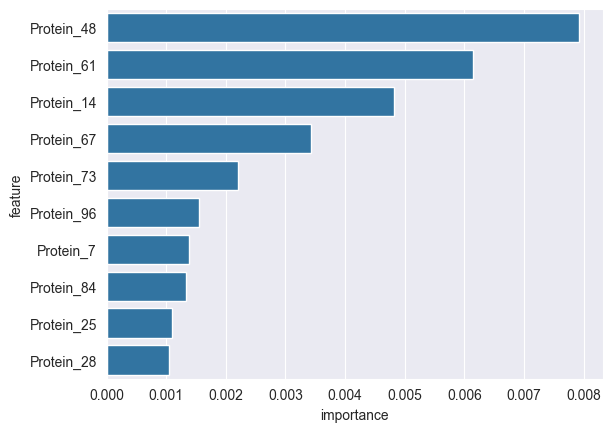

In [19]:
sns.barplot(x="importance", y="feature", data=feature_importances.sort_values("importance", ascending=False).head(10))

In [20]:
from dpks.interpretation import FeatureImportance

importance_calculator = FeatureImportance(
    n_iterations=3,
    feature_names=X.columns.values,
)

importance_calculator.fit(clf, X.values)

In [21]:
pca = UMAP(n_components=2, n_neighbors=5)

components = pca.fit_transform(importance_calculator.local_explanations.T)

In [22]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

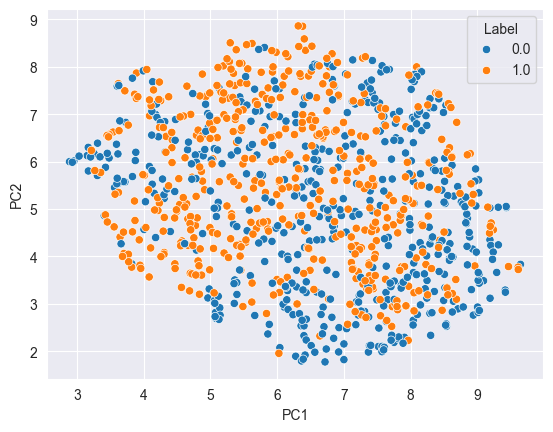

In [23]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [24]:
feature_importances['loss_importance'] = importance_calculator.global_explanations

<Axes: xlabel='loss_importance', ylabel='feature'>

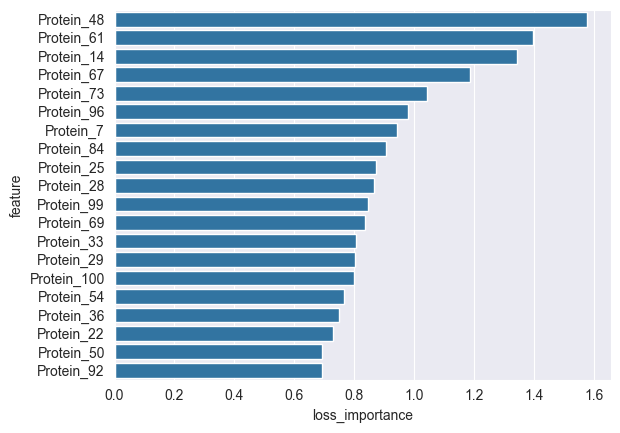

In [25]:
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(20),
    x="loss_importance",
    y="feature"
)

In [26]:
feature_importances['feature_num'] = feature_importances['feature'].str.split("_").str[-1].astype(int)

In [49]:
feature_importances['feature_type'] = np.where(feature_importances['feature_num'] <= 100, 1, 0)

In [50]:
import shap

In [51]:
explainer = shap.LinearExplainer(clf, X)
#explainer = shap.TreeExplainer(clf)
#explainer = shap.Explainer(clf)
shap_values = explainer(X)

In [52]:
feature_importances['shap_importance'] = np.mean(abs(shap_values.values), axis=0)

In [53]:
feature_importances.sort_values("shap_importance", ascending=False)

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance
47,Protein_48,7.924884e-03,3.995640e-09,2.227215,1.577613,48,1,1.337691
60,Protein_61,6.153982e-03,7.987056e-11,2.409246,1.397487,61,1,1.226786
13,Protein_14,4.815323e-03,3.480136e-13,2.576504,1.343545,14,1,1.220000
66,Protein_67,3.425597e-03,1.394999e-08,2.022964,1.186605,67,1,1.056667
72,Protein_73,2.202603e-03,5.502114e-04,1.307851,1.044687,73,1,0.908446
...,...,...,...,...,...,...,...,...
2852,Protein_2853,-2.834595e-10,8.020836e-01,0.016072,0.000025,2853,0,0.000022
4799,Protein_4800,1.040480e-10,2.143995e-01,0.078813,0.000023,4800,0,0.000020
4402,Protein_4403,-2.718564e-10,8.856628e-01,0.009029,0.000010,4403,0,0.000008
2544,Protein_2545,8.048854e-11,4.651445e-01,0.046096,0.000006,2545,0,0.000006


<Axes: xlabel='shap_importance', ylabel='feature'>

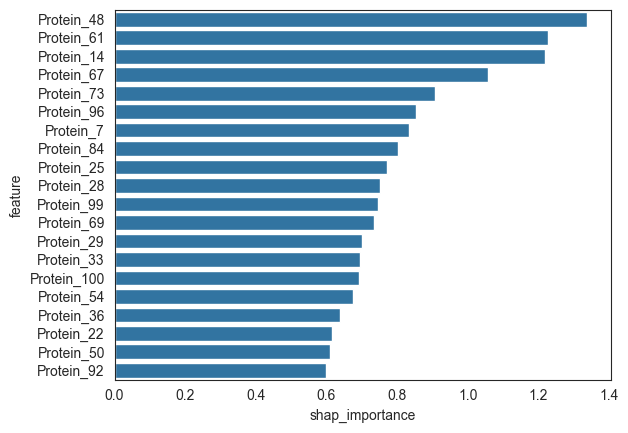

In [54]:
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(20),
    x="shap_importance",
    y="feature"
)

In [55]:
feature_importances

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance
0,Protein_1,3.185547e-05,0.207079,0.449610,0.195006,1,1,0.171295
1,Protein_2,3.475141e-06,0.634612,0.171962,0.062319,2,1,0.055919
2,Protein_3,1.004299e-04,0.003356,1.047580,0.347389,3,1,0.302177
3,Protein_4,-1.901993e-07,0.703464,0.149161,0.007380,4,1,0.006427
4,Protein_5,4.098872e-04,0.000831,1.213110,0.626035,5,1,0.535875
...,...,...,...,...,...,...,...,...
5995,Protein_5996,1.599117e-06,0.220213,0.077153,0.023388,5996,0,0.020879
5996,Protein_5997,3.772329e-07,0.672274,0.027629,0.023083,5997,0,0.019788
5997,Protein_5998,2.965156e-07,0.263344,0.069923,0.012245,5998,0,0.010443
5998,Protein_5999,-4.519317e-08,0.755868,0.020111,0.010301,5999,0,0.008907


[]

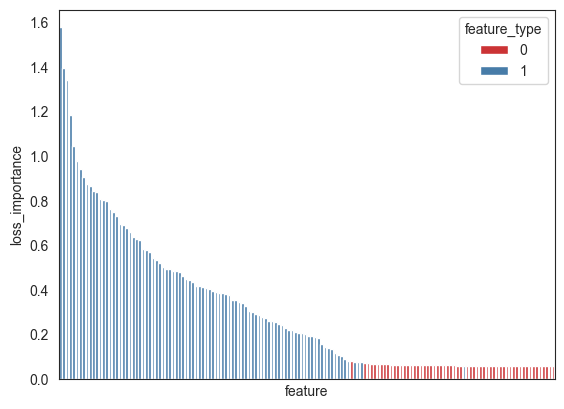

In [56]:
sns.set_style("white")
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(150),
    x="feature",
    y="loss_importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])


[]

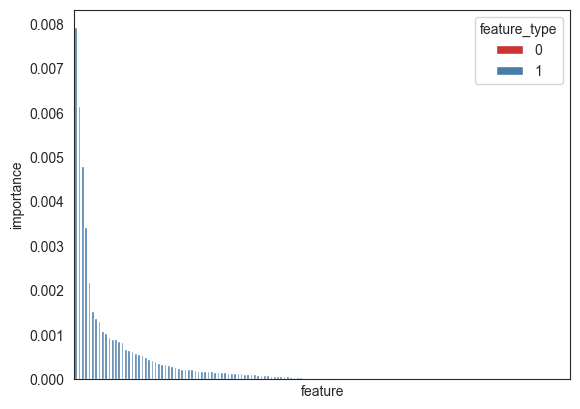

In [57]:
sns.set_style("white")

fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("importance", ascending=False).head(150),
    x="feature",
    y="importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])

[]

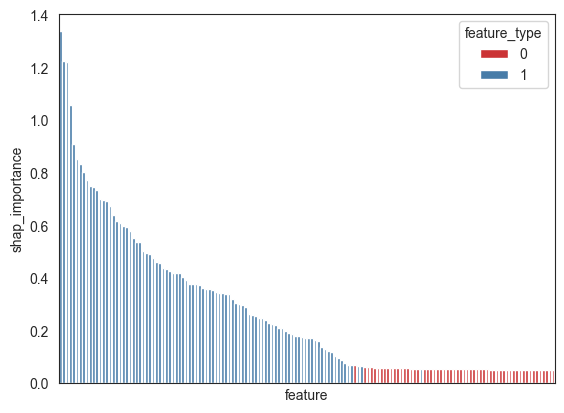

In [58]:
fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(150),
    x="feature",
    y="shap_importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])

<Axes: xlabel='shap_importance', ylabel='loss_importance'>

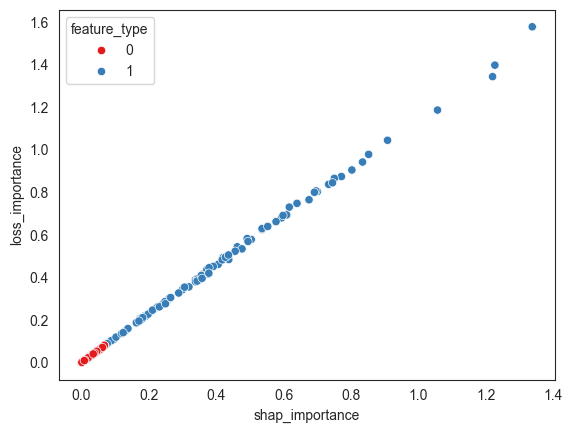

In [59]:
sns.scatterplot(
    data=feature_importances,
    x="shap_importance",
    y="loss_importance",
    hue="feature_type",
    palette="Set1",
)

<Axes: xlabel='importance', ylabel='loss_importance'>

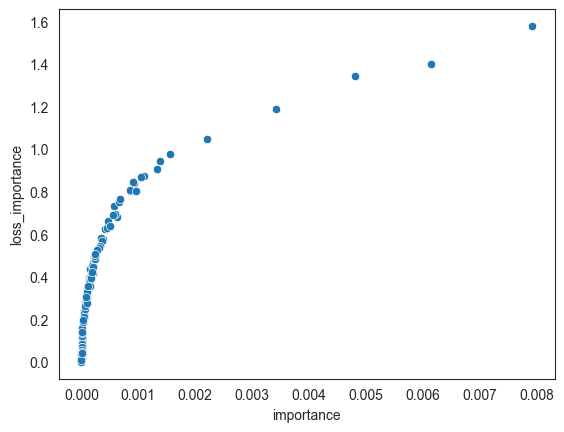

In [60]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='shap_importance'>

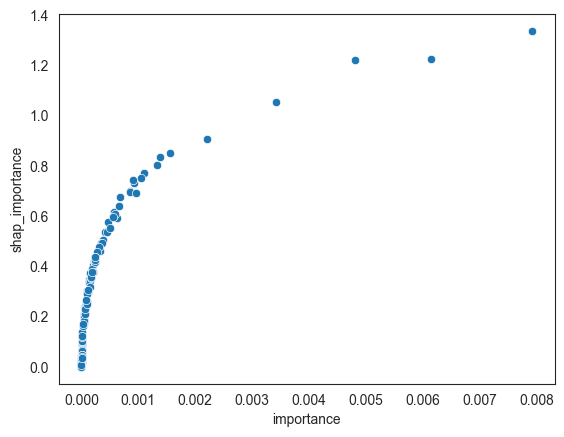

In [61]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="shap_importance",
)

In [66]:
loss_top = feature_importances.sort_values('loss_importance', ascending=False).head(100)
loss_top[loss_top['feature_num'] > 100].shape[0]

9

In [67]:
importance_top = feature_importances.sort_values('importance', ascending=False).head(100)
importance_top[importance_top['feature_num'] > 100].shape[0]

15

In [68]:
shap_top = feature_importances.sort_values('shap_importance', ascending=False).head(100)
shap_top[shap_top['feature_num'] > 100].shape[0]

9

In [90]:
feature_importances['linear_weights'] = np.abs(clf.coef_.ravel())

In [91]:
linear_top = feature_importances.sort_values('linear_weights', ascending=False).head(100)
linear_top[linear_top['feature_num'] > 100].shape[0]

45

<Axes: xlabel='loss_importance', ylabel='linear_weights'>

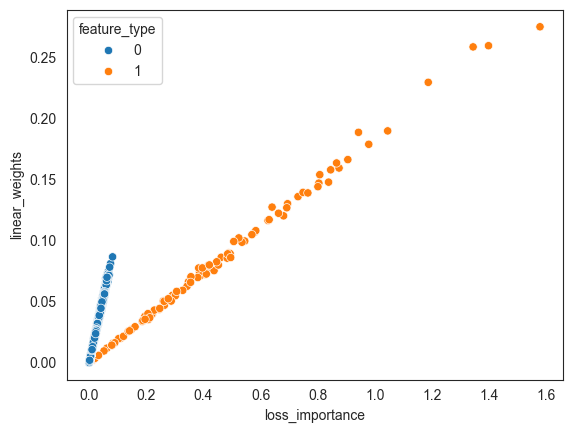

In [92]:
sns.scatterplot(
    data=feature_importances,
    x="loss_importance",
    y="linear_weights",
    hue="feature_type",
)